regression 
- predicting a range of numbers 

KNN regression 
- makes predictions by finding the K nearest data points to a given input and averaging their target values (for numerical regression)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from IPython.display import Image



In [2]:
df = pd.read_csv("./data/Fish.csv")

In [ ]:
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
plt.figure()

plt.scatter(df["Length2"], [])

- greater the length, the weight increases

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"], test_size = 0.25, random_state = 12)

In [5]:
x_train.values

array([41. , 19. , 32. , 27.5, 15.5, 32. , 20.8,  8.4, 23.5, 35. , 30. ,
       33.5, 31.5, 31. , 22.5, 18.2, 11.8, 38.5, 18. , 22.5, 30. , 51.7,
       44. , 26. , 11.3, 24. , 27.5, 63.4, 37.3, 26.5, 30.7, 22.7, 11.8,
       40. , 34. , 46. , 10.5, 24.6, 28. , 28. , 19.6, 23.5, 40. , 25.4,
       27.3, 37. , 41. , 36. , 33.5, 22.5, 39.5, 22. , 25.2, 23. , 37. ,
       34. , 48. , 26. , 31.7, 25. , 21. , 36.4, 31. , 10.6, 36. , 26.5,
       20.7, 30. , 25. , 21. , 43.5, 40. , 22.5, 42.5, 39. , 40. , 27. ,
       43. , 37. ,  9.8, 15. , 18.8, 22. , 28.7, 20. , 21.5, 45. , 29. ,
       26.5, 35. , 19. , 36. , 34.5, 13.7, 32.8, 42. , 13. , 24. , 40. ,
       25.6, 14.1, 22. , 21. , 32. , 27.5, 39. , 32.3, 15. , 39. , 56. ,
       38.5, 23.4, 34.5, 17.4, 29. , 35. , 42.5, 12.4, 16.2])

In [6]:
x_train = np.reshape(x_train.values, (-1, 1))

In [7]:
x_train

array([[41. ],
       [19. ],
       [32. ],
       [27.5],
       [15.5],
       [32. ],
       [20.8],
       [ 8.4],
       [23.5],
       [35. ],
       [30. ],
       [33.5],
       [31.5],
       [31. ],
       [22.5],
       [18.2],
       [11.8],
       [38.5],
       [18. ],
       [22.5],
       [30. ],
       [51.7],
       [44. ],
       [26. ],
       [11.3],
       [24. ],
       [27.5],
       [63.4],
       [37.3],
       [26.5],
       [30.7],
       [22.7],
       [11.8],
       [40. ],
       [34. ],
       [46. ],
       [10.5],
       [24.6],
       [28. ],
       [28. ],
       [19.6],
       [23.5],
       [40. ],
       [25.4],
       [27.3],
       [37. ],
       [41. ],
       [36. ],
       [33.5],
       [22.5],
       [39.5],
       [22. ],
       [25.2],
       [23. ],
       [37. ],
       [34. ],
       [48. ],
       [26. ],
       [31.7],
       [25. ],
       [21. ],
       [36.4],
       [31. ],
       [10.6],
       [36. ],
       [26.5],
       [20

In [8]:
x_test = np.reshape(x_test.values, (-1, 1))

Training the model

In [9]:
knr = KNeighborsRegressor(n_neighbors = 5)

In [10]:
knr.fit(x_train, y_train)

KNeighborsRegressor()

Evaluating the Model

- coefficient of determination 
    - closer to 1 = more accurate 

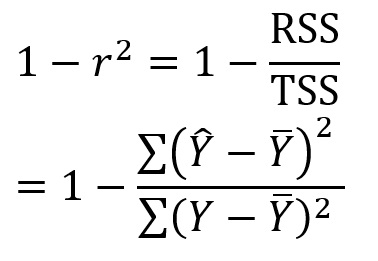

In [12]:
Image(filename='./img/coefficient of determination.jpeg') 

In [14]:
knr.score(x_test, y_test)

0.8375781626224155

mean absolute error 
- absolute value difference between a model's predictions and ground truth, averaged out across the dataset

In [15]:
# predict based on test set 
pred = knr.predict(x_test)

In [16]:
# mean absolute error based on test set 
mae = mean_absolute_error(y_test, pred)

In [17]:
mae

94.21899999999998

In [18]:
pred_df = pd.DataFrame({"ans": y_test, "pred":pred})
pred_df

,ans,pred
88,130.0,144.00
124,1000.0,813.20
45,160.0,145.00
90,110.0,144.00
31,955.0,727.00
23,680.0,584.20
154,12.2,10.84
143,1550.0,1037.40
149,9.8,8.62
136,540.0,813.20


problem with KNN -> can't predict data after certain point 

In [19]:
max(x_train)

array([63.4])

In [20]:
knr.predict([[50]])

array([757.4])

In [21]:
max(y_train)

1650.0

In [23]:
dist, idx = knr.kneighbors([[50]])

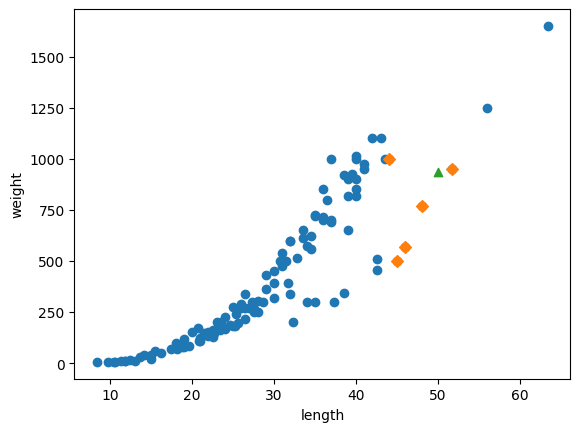

In [24]:
plt.figure()

plt.scatter(x_train, y_train)
plt.scatter(x_train[idx], y_train.iloc[idx.flatten()], marker = "D")
plt.scatter(50, 934, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()